<a href="https://colab.research.google.com/github/kobrue02/evaluating-llm-generated-nlu-data/blob/main/bin/notebooks/compare_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/kobrue02/evaluating-llm-generated-nlu-data/
%cd evaluating-llm-generated-nlu-data

Cloning into 'evaluating-llm-generated-nlu-data'...
remote: Enumerating objects: 1080, done.
remote: Counting objects: 100% (196/196), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 1080 (delta 110), reused 123 (delta 54), pack-reused 884 (from 1)
Receiving objects: 100% (1080/1080), 11.32 MiB | 8.03 MiB/s, done.
Resolving deltas: 100% (708/708), done.
/content/evaluating-llm-generated-nlu-data/evaluating-llm-generated-nlu-data


In [6]:
import numpy as np
import pandas as pd
import scipy
from scipy.stats import entropy
from scipy.spatial.distance import jensenshannon
from scipy.special import kl_div

from bin.utils.methods import load_sipgate_dataset, load_df

In [7]:
def js_divergence(p, q):
  p = np.asarray(p)
  q = np.asarray(q)
  return jensenshannon(p, q)

In [14]:
!ls

bin  data  output  plots_few_shot.png  plots_one_shot.png  README.md


In [13]:
golden_data = pd.read_csv("output/sipgate_data_results.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'output/sipgate_data_results.csv'

In [ ]:
datasets = ["few_shot_simple_data_results", "one_shot_simple_data_results", "zero_shot_simple_data_results"]
divergences = {}
for dataset in datasets:
    generated_data = pd.read_csv(f"output/{dataset}.csv")
    divergence = {}
    for metric in golden_data.columns:
        if metric == "intent":
            continue
        jsd = js_divergence(generated_data[metric], golden_data[metric])
        print(metric, jsd)
        divergence[metric] = jsd
    divergences[dataset] = divergence

perplexity 0.0817866513152268
distinct_1 0.11566297930818277
distinct_2 0.08023083100802426
ttr 0.019380469732839224
moving_average_ttr nan
average_n_of_tokens 0.2780845910762869
average_n_of_characters 0.269356231664789
distance_to_centroid 0.06012566958127608
discourse_coherence 0.8046640503517715
inter_sentence_similarity 0.08282073051601385
perplexity 0.06570851969315211
distinct_1 0.12066110063501388
distinct_2 0.10171245310809571
ttr 0.06966672509942293
moving_average_ttr nan
average_n_of_tokens 0.4310840597564042
average_n_of_characters 0.43424920873271156
distance_to_centroid 0.09111099482775725
discourse_coherence 0.7925924737860218
inter_sentence_similarity 0.08992573528452448
perplexity 0.07567105630721643
distinct_1 0.09636062947471905
distinct_2 0.07308214070204717
ttr 0.008870904173344235
moving_average_ttr nan
average_n_of_tokens 0.12747175015236362
average_n_of_characters 0.12785223478930594
distance_to_centroid 0.046195038730409255
discourse_coherence 0.793713059698250

/usr/local/lib/python3.11/dist-packages/scipy/spatial/distance.py:1262: RuntimeWarning: invalid value encountered in divide
  q = q / np.sum(q, axis=axis, keepdims=True)
/usr/local/lib/python3.11/dist-packages/scipy/spatial/distance.py:1262: RuntimeWarning: invalid value encountered in divide
  q = q / np.sum(q, axis=axis, keepdims=True)
/usr/local/lib/python3.11/dist-packages/scipy/spatial/distance.py:1261: RuntimeWarning: invalid value encountered in divide
  p = p / np.sum(p, axis=axis, keepdims=True)
/usr/local/lib/python3.11/dist-packages/scipy/spatial/distance.py:1262: RuntimeWarning: invalid value encountered in divide
  q = q / np.sum(q, axis=axis, keepdims=True)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

<ipython-input-10-6c10f87e6725>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=40, ha="right")


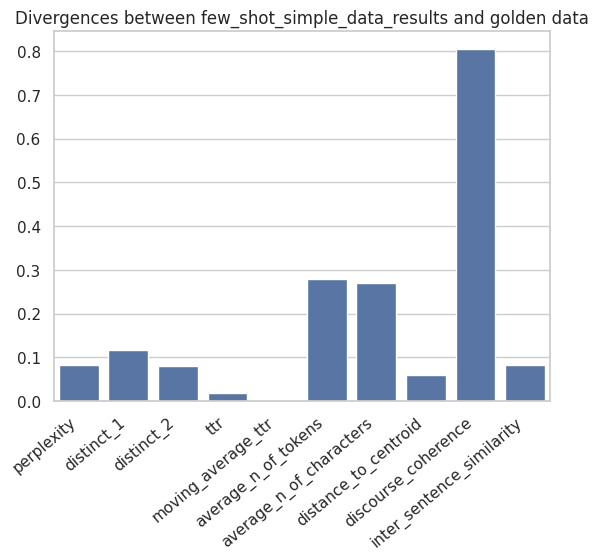

<ipython-input-10-6c10f87e6725>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=40, ha="right")


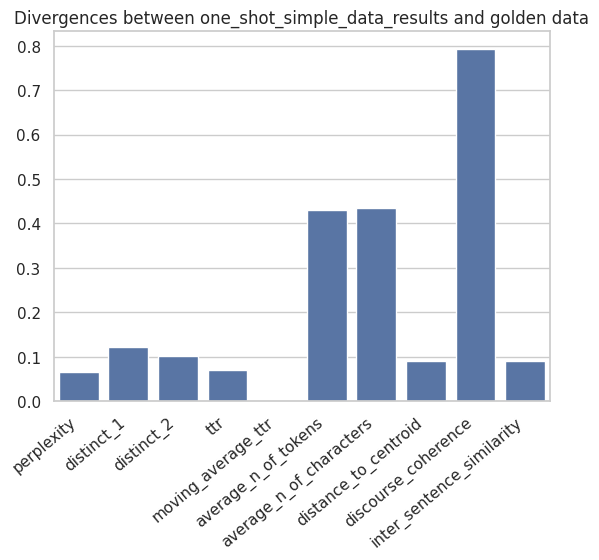

<ipython-input-10-6c10f87e6725>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=40, ha="right")


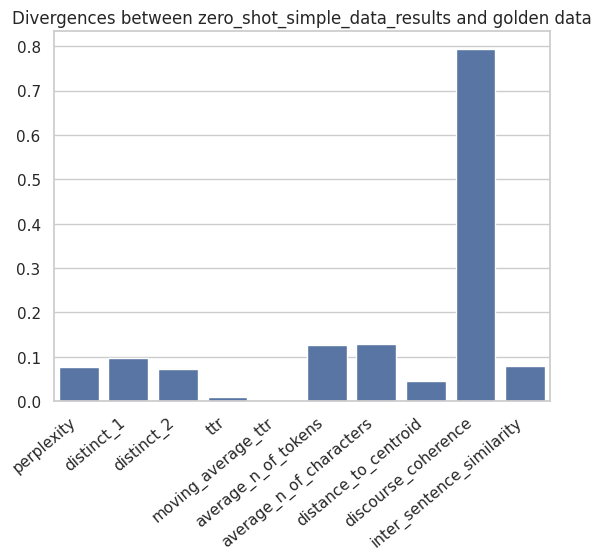

In [ ]:
# plot divergences
for dataset, divergence in divergences.items():
  plot = sns.barplot(x=list(divergence.keys()), y=list(divergence.values()))
  plot.set_xticklabels(plot.get_xticklabels(), rotation=40, ha="right")
  plt.title(f"Divergences between {dataset} and golden data")
  plt.show()